In [129]:
import pandas as pd
from textblob import TextBlob

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#read dataset
df1 = pd.read_csv('womens_clothing.csv')

In [32]:
#dropping unnamed columns
df2 = df1.drop(df1.columns[0], axis=1)

In [33]:
#columns to lower case
df2.columns = df2.columns.str.lower()

In [34]:
# ETA 
df2.describe()

,clothing id,age,rating,recommended ind,positive feedback count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [35]:
df2.shape

(23486, 10)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review text              22641 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended ind          23486 non-null  int64 
 6   positive feedback count  23486 non-null  int64 
 7   division name            23472 non-null  object
 8   department name          23472 non-null  object
 9   class name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [69]:
df2.head(10)

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [65]:
# Groupby with Pandas: average rating by division
div_rating = df2.groupby(['division name', 'department name'], dropna=True)['rating'].mean().to_frame()
div_rating

rating
division name  department name          
General        Bottoms          4.268686
               Dresses          4.163003
               Jackets          4.240310
               Tops             4.148749
               Trend            3.822917
General Petite Bottoms          4.329356
               Dresses          4.133256
               Intimate         4.240343
               Jackets          4.304910
               Tops             4.216469
               Trend            3.782609
Initmates      Intimate         4.286285

<AxesSubplot:xlabel='division name,department name'>

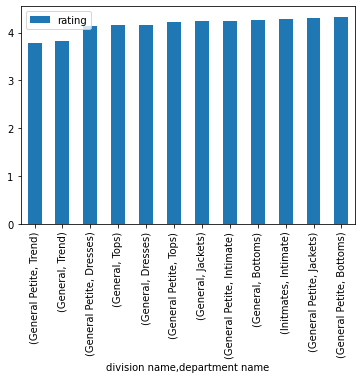

In [195]:
# visualize rating as a bar chart
div_rating.sort_values('rating', inplace=True) 
div_rating.plot.bar()

In [ ]:
# spot /sample check on the review column

In [90]:
# spot check 1
comment1 = TextBlob(df2.at[5, 'review text'])
print(df2['review text'][5])
print(comment.sentiment)

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.
Sentiment(polarity=0.5583333333333333, subjectivity=0.6)


In [91]:
# spot check 2
comment2 = TextBlob(df2.at[1, 'review text'])
print(df2['review text'][1])
print(comment.sentiment)

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Sentiment(polarity=0.5583333333333333, subjectivity=0.6)


In [92]:
# spot check 3
comment3 = TextBlob(df2.at[10, 'review text'])
print(df2['review text'][10])
print(comment.sentiment)

Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.
Sentiment(polarity=0.5583333333333333, subjectivity=0.6)


In [93]:
# spot check 4
comment4 = TextBlob(df2.at[30, 'review text'])
print(df2['review text'][15])
print(comment.sentiment)

I took these out of the package and wanted them to fit so badly, but i could tell before i put them on that they wouldn't. these are for an hour-glass figure. i am more straight up and down. the waist was way too small for my body shape and even if i sized up, i could tell they would still be tight in the waist and too roomy in the hips - for me. that said, they are really nice. sturdy, linen-like fabric, pretty color, well made. i hope they make someone very happy!
Sentiment(polarity=0.5583333333333333, subjectivity=0.6)


In [94]:
# transform to sentence lst
sentence_lst = []
for sentence in comment1.sentences:
    sentence_lst.append(sentence)
sentence_lst

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [196]:
# dropping and checking review text
df2 = df2.dropna(subset=['review text'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clothing id              22641 non-null  int64  
 1   age                      22641 non-null  int64  
 2   title                    19675 non-null  object 
 3   review text              22641 non-null  object 
 4   rating                   22641 non-null  int64  
 5   recommended ind          22641 non-null  int64  
 6   positive feedback count  22641 non-null  int64  
 7   division name            22628 non-null  object 
 8   department name          22628 non-null  object 
 9   class name               22628 non-null  object 
 10  polartiy                 22641 non-null  float64
 11  polarity                 22641 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.2+ MB


In [105]:
# Sentiment function
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [110]:
# calculate sentiment polarity for each row of the filtered review data set, as a new column
df2['polarity'] = df2['review text'].apply(sentiment).apply(lambda x:x[0])
df2

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name,polartiy,polarity
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.633333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.339583
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.073675
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.550000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.512891
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,0.552667
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.091667
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,0.414286
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.322222


In [200]:
# summarise the minimum review polarity, by division and department as a new datafram
div_polarity_min = df2.groupby(['division name', 'department name'], dropna=True)['polarity'].min().to_frame()
div_polarity_min.sort_values('polarity', inplace=True) 
div_polarity_min

polarity
division name  department name          
General        Tops            -0.975000
               Dresses         -0.916667
               Jackets         -0.750000
General Petite Tops            -0.700000
               Intimate        -0.575000
               Jackets         -0.562500
General        Bottoms         -0.533333
General Petite Dresses         -0.400000
Initmates      Intimate        -0.392333
General        Trend           -0.270833
General Petite Bottoms         -0.257778
               Trend           -0.083333

<AxesSubplot:xlabel='division name,department name'>

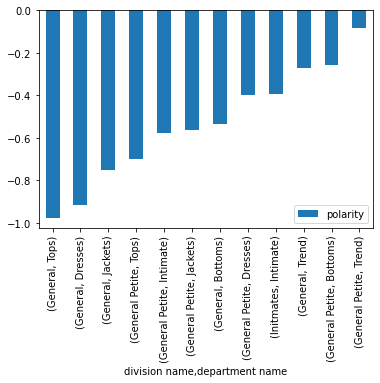

In [201]:
# plotting polarity min
div_polarity_min.plot.bar()

In [202]:
# summarise the average review polarity, by division and department as a new dataframe
div_polarity_mean = df2.groupby(['division name', 'department name'], dropna=True)['polarity'].mean().to_frame()
div_polarity_mean.sort_values('polarity', inplace=True) 
div_polarity_mean

polarity
division name  department name          
General Petite Trend            0.195925
General        Trend            0.203986
               Jackets          0.237141
General Petite Intimate         0.239517
               Jackets          0.241773
General        Bottoms          0.245849
               Tops             0.247025
General Petite Dresses          0.248380
General        Dresses          0.251091
General Petite Tops             0.256835
Initmates      Intimate         0.256979
General Petite Bottoms          0.259258

<AxesSubplot:xlabel='division name,department name'>

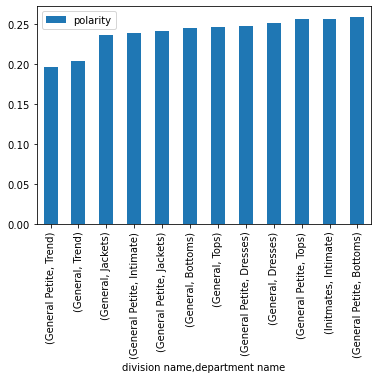

In [203]:
# plotting polarity mean
div_polarity_mean.plot.bar()